# Classifying stuff

In [1]:
import napari
from macrohet import dataio, tile, visualise
import os, glob

### Load experiment of choice

The Opera Phenix is a high-throughput confocal microscope that acquires very large 5-dimensional (TCZXY) images over several fields of view in any one experiment. Therefore, a lazy-loading approach is chosen to mosaic, view and annotate these images. This approach depends upon Dask and DaskFusion. The first step is to load the main metadata file (typically called `Index.idx.xml` and located in the main `Images` directory) that contains the image filenames and associated TCXZY information used to organise the images.

In [2]:
expt_ID = 'PS0000'
base_dir = f'/mnt/DATA/macrohet/{expt_ID}/'
metadata_fn = os.path.join(base_dir, 'acquisition/Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!


,id,State,URL,Row,Col,FieldID,PlaneID,TimepointID,ChannelID,FlimID,...,PositionZ,AbsPositionZ,MeasurementTimeOffset,AbsTime,MainExcitationWavelength,MainEmissionWavelength,ObjectiveMagnification,ObjectiveNA,ExposureTime,OrientationMatrix
0,0303K1F1P1R1,Ok,r03c03f01p01-ch1sk1fk1fl1.tiff,3,3,1,1,0,1,1,...,0,0.135583505,0,2021-04-16T19:09:33.84+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
1,0303K1F1P1R2,Ok,r03c03f01p01-ch2sk1fk1fl1.tiff,3,3,1,1,0,2,1,...,0,0.135583505,0,2021-04-16T19:09:33.84+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
2,0303K1F1P2R1,Ok,r03c03f01p02-ch1sk1fk1fl1.tiff,3,3,1,2,0,1,1,...,2E-06,0.135585502,0,2021-04-16T19:09:34.12+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
3,0303K1F1P2R2,Ok,r03c03f01p02-ch2sk1fk1fl1.tiff,3,3,1,2,0,2,1,...,2E-06,0.135585502,0,2021-04-16T19:09:34.12+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
4,0303K1F1P3R1,Ok,r03c03f01p03-ch1sk1fk1fl1.tiff,3,3,1,3,0,1,1,...,4E-06,0.135587499,0,2021-04-16T19:09:34.4+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113395,0609K75F9P1R2,Ok,r06c09f09p01-ch2sk75fk1fl1.tiff,6,9,9,1,74,2,1,...,0,0.135533601,266399.61,2021-04-19T21:14:19.477+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113396,0609K75F9P2R1,Ok,r06c09f09p02-ch1sk75fk1fl1.tiff,6,9,9,2,74,1,1,...,2E-06,0.135535598,266399.61,2021-04-19T21:14:19.757+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113397,0609K75F9P2R2,Ok,r06c09f09p02-ch2sk75fk1fl1.tiff,6,9,9,2,74,2,1,...,2E-06,0.135535598,266399.61,2021-04-19T21:14:19.757+01:00,640,706,40,1.1,0.2,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."
113398,0609K75F9P3R1,Ok,r06c09f09p03-ch1sk75fk1fl1.tiff,6,9,9,3,74,1,1,...,4E-06,0.135537595,266399.61,2021-04-19T21:14:20.037+01:00,488,522,40,1.1,0.1,"[[0.990860,0,0,-15.9],[0,-0.990860,0,-44.8],[0..."


### View assay layout and mask information (optional)

The Opera Phenix acquires many time lapse series from a range of positions. The first step is to inspect the image metadata, presented in the form of an `Assaylayout/experiment_ID.xml` file, to show which positions correspond to which experimental assays.

In [3]:
metadata_path = os.path.join(base_dir, 'acquisition/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml')
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)
assay_layout

Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
Row Column                                              
3   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
4   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA            60            EC50
    7          WT      RIF           0.1            EC50
    8          WT      INH          0.04            EC50
    9          WT      BDQ          0.02            EC50
5   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99
6   4         RD1     CTRL             0             EC0
    5          WT     CTRL             0             EC0
    6          WT      PZA           400            EC99
    7          WT      RIF             2            EC99
    8          WT      INH             2            EC99
    9          WT      BDQ           2.5            EC99

### Define row and column of choice

In [4]:
acq_ID = row, column = (3, 5)

### Define subset if non-square tiling or more than one contiguous region of images in imaging well. 

In [5]:
# subset_field_IDs = ['1','6','7','8','11','12','13','14','15']

### Now to lazily mosaic the images using Dask prior to viewing them.

1x (75,2,3) [TCZ] image stack takes approximately 1 minute to stitch together, so only load the one field of view I want.

In [5]:
%%time
# image_dir = os.path.join(base_dir, 'macrohet_images/Images_8bit')
image_dir = os.path.join(base_dir, 'acquisition/Images')
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             # subset_field_IDs=['16', '17',  '20', '21'], 
                             # n_tile_rows = 2, n_tile_cols = 2,
                             set_plane='max_proj',
                             # set_channel=1,
                             # set_time = 1,
#                             input_transforms = [input_transforms]
                            )#.compute().compute()
images

CPU times: user 604 ms, sys: 3.3 ms, total: 608 ms
Wall time: 607 ms


dask.array<max-aggregate, shape=(75, 2, 6048, 6048), dtype=uint16, chunksize=(1, 2, 2160, 2160), chunktype=numpy.ndarray>

In [6]:
%%time
images = images.compute().compute()

CPU times: user 3h 28min 19s, sys: 19min 41s, total: 3h 48min
Wall time: 8min 49s


In [7]:
images.shape

(75, 2, 6048, 6048)

In [8]:
viewer = napari.Viewer()

viewer.add_image(images, channel_axis = 1)

[<Image layer 'Image' at 0x7fb550ca6940>,
 <Image layer 'Image [1]' at 0x7fb52caa9040>]

In [9]:
print()

# Load tracks

In [10]:
import btrack
print(btrack.__version__)

0.6.1.dev116


In [11]:
tracks_fn = os.path.join(base_dir, f'labels/macrohet_seg_model/{row, column}.h5')
with btrack.io.HDF5FileHandler(tracks_fn, 'r') as hdf:
    tracks = hdf.tracks
    segmentation = hdf.segmentation
napari_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim=2)

[INFO][2024/01/04 01:26:35 pm] Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2024/01/04 01:26:35 pm] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/01/04 01:26:35 pm] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/01/04 01:26:35 pm] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2024/01/04 01:26:45 pm] Loading segmentation (75, 6048, 6048)
INFO:btrack.io.hdf:Loading segmentation (75, 6048, 6048)
[INFO][2024/01/04 01:26:45 pm] Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5


In [59]:
filtered_tracks = [t for t in tracks if len(t) > 25]

In [61]:
napari_filtered_tracks, properties, graph = btrack.utils.tracks_to_napari(filtered_tracks, 
                                                                    ndim=2)

In [12]:
import json
dict_fn = f'/mnt/DATA/macrohet/{expt_ID}/upstream_development/tracking/tracking_performance/v1>70/{row},{column}/{acq_ID}_track_assessment.json'
with open(dict_fn) as json_data:
    track_dict = json.load(json_data)
true_IDs = [int(ID) for ID in track_dict.keys() if track_dict[ID] == True]
true_tracks = [t for t in tracks if t.ID in true_IDs]
napari_true_tracks, properties, graph = btrack.utils.tracks_to_napari(true_tracks, ndim=2)

### Recolour tracks

In [13]:
col_segmentation = btrack.utils.update_segmentation(segmentation, true_tracks, scale = (5.04, 5.04))

# Launch napari image viewer

In [14]:
# # %time
# viewer = napari.Viewer(title = f'{row, column}')

# viewer.add_image(images, 
#                  channel_axis=1,
#                  name=["macrophage", "mtb"],
#                  colormap=["green",  "magenta"],
# #                  contrast_limits=[[100, 6000], [100, 2000]],
#                  contrast_limits=[[0,450], [0,450]], 
#                  visible = True
#                  )
# viewer.add_image(images, 
#                  channel_axis=1,
#                  name=["macrophage", "mtb"],
#                  colormap=["green",  "magenta"],
# #                  contrast_limits=[[100, 6000], [100, 2000]],
# #                  contrast_limits=[[0,450], [0,450]], 
#                  visible = True
#                  )
viewer.add_labels(segmentation, 
#                   num_colors= 1,
                  #scale=(10, 1, 1,), 
                  #color='yellow'
                  name = 'segmentation'
                 )
# viewer.add_labels(col_segmentation, 
#                   name = 'recolored segmentation'
#                   #scale=(10, 1, 1,), 
#                   #color='yellow'
#                  )
# viewer.add_tracks(napari_tracks, scale = (1,5.04,5.04)
# #                     properties=properties, 
# #                     graph=graph, 
# #                     name="Properly downscaled tracks", 
# #                     blending="translucent",
# #                     visible=True,
# # #                     scale = (100,1,1)
#                  )
viewer.add_tracks(napari_true_tracks, scale = (1,5.04,5.04),
#                     properties=properties, 
#                     graph=graph, 
#                     name="Properly downscaled tracks", 
#                     blending="translucent",
#                     visible=True,
# #                     scale = (100,1,1)
                 )

<Tracks layer 'napari_true_tracks' at 0x7fb5632619d0>

In [26]:
visualise.highlight_cell(507, viewer, tracks)

<Points layer 'cell 507 [1]' at 0x7f7586e5af10>

In [17]:
sd_2_75 = ['444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '602.3.5',
 '1118.3.5',
 '1129.3.5',
 '628.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']

sd_2_5 = ['218.3.5',
 '44.3.5',
 '444.3.5',
 '447.3.5',
 '507.3.5',
 '51.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '602.3.5',
 '64.3.5',
 '585.3.5',
 '1611.3.5',
 '89.3.5',
 '1118.3.5',
 '1129.3.5',
 '628.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']

sd_3 = ['444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '1118.3.5',
 '1129.3.5',
 '628.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']

In [38]:
set(sd_2_5) - set(sd_3)

{'1611.3.5',
 '218.3.5',
 '410.3.5',
 '44.3.5',
 '447.3.5',
 '507.3.5',
 '51.3.5',
 '585.3.5',
 '602.3.5',
 '64.3.5',
 '89.3.5'}

In [19]:
2/len(sd_2_75)*100

11.76470588235294

In [16]:
for ID in ['444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '602.3.5', # think it probably is death, but not evidently 
 '1118.3.5',
 '1129.3.5', # false, last min ID switch
 '628.3.5', # false, looses track
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']:
    visualise.highlight_cell(int(ID.split('.')[0]), viewer, tracks)

# Shall I train CNN on isolated cell death examples?

surely this would require perfect tracks? what if i use TAP? 

In [22]:
# first try and understand how many cell deaths are caught by my janky catch 'all'
visualise.add_napari_grid_overlay(viewer, N_rows_cols=5)

<Shapes layer 'grid_lines [1]' at 0x7fb54038c0a0>

In [28]:
#IDs not caught by my definition@

missed_deaths = [432, 
                 431, 354, 397, 426, 424, 1308, 384, 1611, 473, 491, 3179, 486, 515, 15, 34, 119, 112, 26, 110, 144, 252, 286, 107]
len(sd_2_75)/len(missed_deaths)*100

70.83333333333334

In [31]:
death_cells = missed_deaths + [int(ID.split('.')[0]) for ID in ['444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '1118.3.5',
'642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']]

In [32]:
death_cells

[432,
 431,
 354,
 397,
 426,
 424,
 1308,
 384,
 1611,
 473,
 491,
 3179,
 486,
 515,
 15,
 34,
 119,
 112,
 26,
 110,
 144,
 252,
 286,
 107,
 444,
 530,
 542,
 552,
 1118,
 642,
 131,
 204,
 1356,
 344,
 410,
 461,
 997,
 493]

In [33]:
for ID in death_cells:
    visualise.highlight_cell(ID, viewer, tracks)

In [45]:
visualise.highlight_cell(441, viewer, tracks)

<Points layer 'cell 441' at 0x7fb52a24a070>

# Isolating efferoctyoses

from whole list of tracks

In [47]:
len(tracks)

2420

In [94]:
import matplotlib.pyplot as plt
from skimage.measure import label
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

import pandas as pd

In [58]:
np.max(label(segmentation[0]))

670

In [61]:
n_masks_per_frame = [np.max(label(segmentation[i])) for i in range(len(segmentation))]

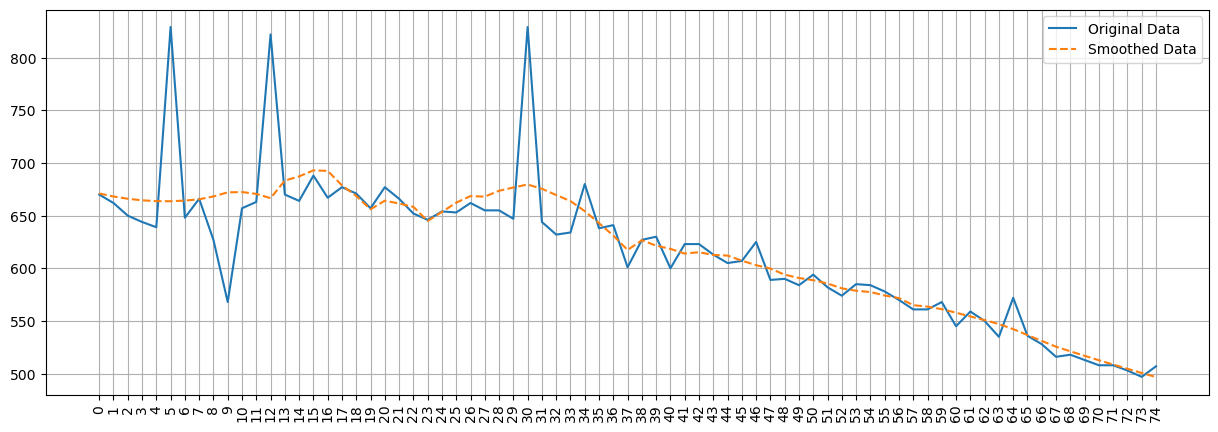

In [76]:
# Smooth the data using a Savitzky-Golay filter
window_length = 15  # Adjust the window length as needed
smoothed_data = savgol_filter(n_masks_per_frame, window_length, 2)  # The '2' is the order of the smoothing

# Set the figure size
plt.figure(figsize=(15, 5))  # Adjust the width (10) and height (5) as needed

# Plot the original data
plt.plot(n_masks_per_frame, label='Original Data')

# Plot the smoothed data on top
plt.plot(smoothed_data, label='Smoothed Data', linestyle='--')

# Specify the locations of vertical grid lines
x_values = range(len(n_masks_per_frame))
plt.xticks(x_values, rotation=90)  # Rotate x-labels by 90 degrees

# Add grid lines
plt.grid()

# Add a legend to differentiate between the original and smoothed data
plt.legend()

# Show the plot
plt.show()

(array([832., 244., 199., 117.,  68.,  70.,  86.,  66.,  69.,  49.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

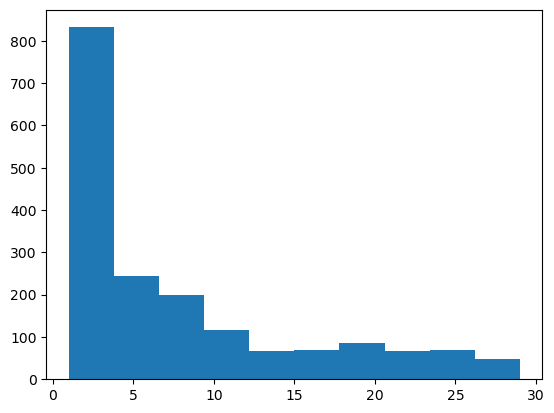

In [52]:
plt.hist([len(t) for t in tracks if len(t) <30])

In [85]:
# broadly speaking efferocytotic tracks will not last the whole time lapse... 
# also they will need at least 3 frame to guarantee merging
# and i want them to be at least 10 frames long as it looks like 
poss_eff_tracks = [t for t in tracks if 15 <= len(t) < 71]

In [86]:
len(poss_eff_tracks)

756

In [103]:
len(set(df['Cell ID'].unique()))

377

In [91]:
ids = [ID.ID for ID in poss_eff_tracks]

In [95]:
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl')


In [105]:
poss_eff_IDs = list(set(ids).difference(set(df['Cell ID'].unique())))

In [106]:
len(poss_eff_IDs)

567

so now this set of tracks is filtered to not include true tracks which by definition would not have included an efferocytosis? as well as all other tracks that 

In [107]:
poss_eff_tracks = [t for t in tracks if t.ID in poss_eff_IDs]

(array([141., 100.,  95.,  75.,  34.,  32.,  38.,  22.,  20.,  10.]),
 array([15. , 20.4, 25.8, 31.2, 36.6, 42. , 47.4, 52.8, 58.2, 63.6, 69. ]),
 <BarContainer object of 10 artists>)

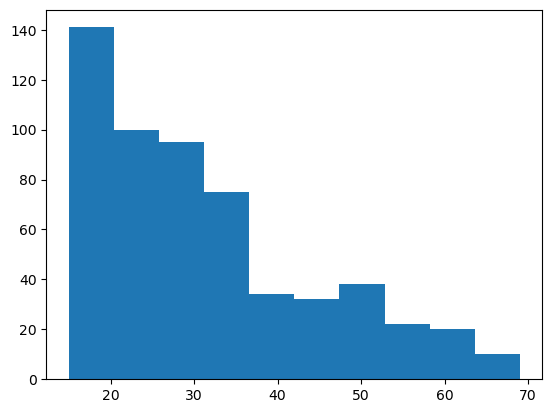

In [114]:
plt.hist([len(t) for t in poss_eff_tracks])

### Need to further filter these tracks... efferocytosis would involve a sudden change in mtb or gfp fluorescence but so would a false ID switch

What about a small area and large area colocalising?

In [112]:
napari_poss_eff_tracks, properties, graph = btrack.utils.tracks_to_napari(poss_eff_tracks, ndim=2)

In [113]:
viewer.add_tracks(napari_poss_eff_tracks, scale = (1,5.04,5.04),)

<Tracks layer 'napari_poss_eff_tracks' at 0x7fb52e9bc6d0>

In [111]:
for n, ID in enumerate(poss_eff_IDs):
    visualise.highlight_cell(ID, viewer, tracks)
    if n == 10:
        break

# This is potentially the wrong approach, need to classify true tracks that have died or survided as a whether or not they were efferocytosed on the way... or efferocytosis is a fate for one type of cell or ex cell

In [117]:
ID

'252'

In [119]:
for ID in ['252.3.5',
 '486.3.5',
 '507.3.5',
 '515.3.5',
 '530.3.5',
 '542.3.5',
 '1611.3.5',
 '1118.3.5',
 '3179.3.5',
 '110.3.5',
 '112.3.5',
 '119.3.5',
 '1356.3.5',
 '384.3.5',
 '410.3.5',
 '426.3.5',
 '431.3.5',
 '432.3.5',
 '461.3.5',
 '473.3.5',
 '997.3.5',
 '491.3.5']:
    ID =int( ID.split('.')[0])
    visualise.highlight_cell(ID, viewer, tracks)

In [329]:
viewer.window.add_dock_widget(visualise.highlight_cell_gui(tracks))